# Getting started with using Bayesian Classifiers.
- Currently trying to get an understantind of what it is that i should be doing, as there are differnt forms of this topic that i am seeing, such as Gaussian Naive Bayes and Multinomial Naive Bayes.
- Still trying to figure out weather or not i should be usi g all of these or just one. 
 

In [65]:
# Getting started with some general 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # vision libary that is used to build style plots

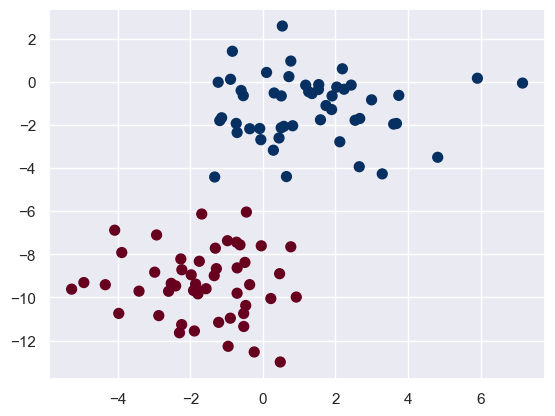

In [66]:
from sklearn.datasets import make_blobs # generates a dataset of two clusters
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [67]:
from sklearn.naive_bayes import GaussianNB # this imports the Gaussian Naive Bayes classifier
model = GaussianNB()
model.fit(X, y); # training the model on the x and y features 

In [68]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2) # This is what is used to make the predications, by generating new points on the 2d graph
ynew = model.predict(Xnew)

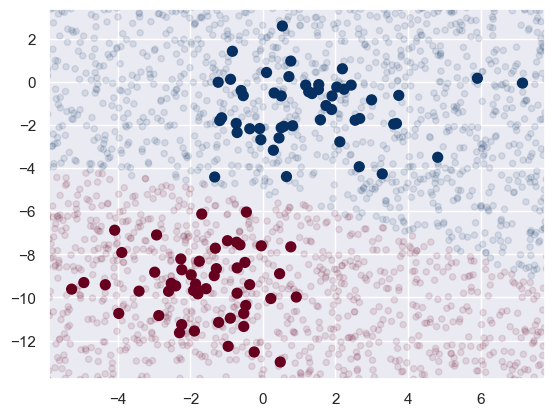

In [69]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [70]:
yprob = model.predict_proba(Xnew) # generates the predicition of the posterior probability P(A|B)
yprob[-8:].round(2) # This rounds it to two deciamls places

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [71]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [72]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [73]:
print(train.data[5])


From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [75]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

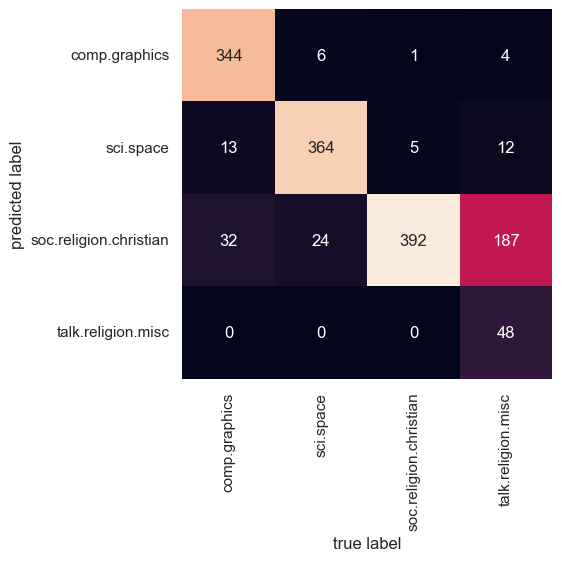

In [76]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [77]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [78]:
predict_category('sending a payload to the ISS')


'sci.space'

# Bayesian Classifiers using a disease dataset
## Change Log
- Added the data set to the code for reading

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
# Load the dataset
dataset = pd.read_csv("dataset.csv")

# Combine symptoms into a single string for each row
dataset['symptoms_combined'] = dataset['symptoms'].apply(lambda x: ' '.join(x.split(',')))

# Display the updated dataset
print(dataset.head())

        disease                                           symptoms  \
0           flu  fever,cough,sore throat,runny or stuffy nose,m...   
1    bronchitis  cough,mucus production,shortness of breath,che...   
2     pneumonia  fever,cough,shortness of breath,chest pain,fat...   
3  heart attack  chest pain,shortness of breath,nausea,vomiting...   
4        stroke  sudden weakness,numbness on one side of the bo...   

                                               cures  \
0           over-the-counter medications,rest,fluids   
1  antibiotics,over-the-counter medications,rest,...   
2  antibiotics,over-the-counter medications,rest,...   
3                         emergency medical services   
4                         emergency medical services   

                        doctor     risk level  \
0    family doctor,urgent care      low (0.1%   
1  family doctor,pulmonologist      low (0.5%   
2  family doctor,pulmonologist  moderate (1%)   
3                 cardiologist     high (20%) 

In [82]:
# Split the data (80% training, 20% testing)
train_data, test_data, train_labels, test_labels = train_test_split(
    dataset['symptoms_combined'], dataset['disease'], test_size=0.2, random_state=42
)

In [83]:
# Create a pipeline with TF-IDF Vectorizer and Multinomial Naive Bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(train_data, train_labels)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

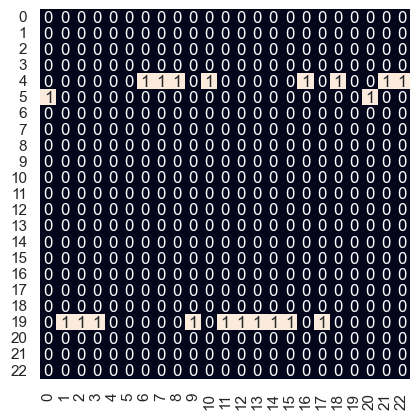

In [ ]:
# Predict on the test set
predicted_labels = model.predict(test_data)

# Display classification report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

# Generate and plot the confusion matrix
mat = confusion_matrix(test_labels, predicted_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=dataset['disease'].unique(), yticklabels=dataset['disease'].unique())
plt.xlabel('True Label')
plt.ylabel('Predicted Label')
plt.show()

In [97]:
# Utility function to predict disease for new symptoms
def predict_disease(symptoms, model=model):
    pred = model.predict([symptoms])
    return pred[0]

# Example: Predict disease for new symptoms
new_symptoms = "cough "
predicted_disease = predict_disease(new_symptoms)
print(f"Predicted Disease: {predicted_disease}")

Predicted Disease: pneumonia


Classification Report:
                            precision    recall  f1-score   support

      acanthamoebkeratitis       0.00      0.00      0.00       1.0
acute kidney injury (aki)        0.00      0.00      0.00       1.0
             aflatoxicosis       0.00      0.00      0.00       1.0
         allergic rhinitis       0.00      0.00      0.00       1.0
       alzheimer's disease       0.00      0.00      0.00       0.0
                 arthritis       0.00      0.00      0.00       0.0
         asperger syndrome       0.00      0.00      0.00       1.0
            bladder cancer       0.00      0.00      0.00       1.0
                    cancer       0.00      0.00      0.00       1.0
               common cold       0.00      0.00      0.00       1.0
      erectile dysfunction       0.00      0.00      0.00       1.0
              fibromyalgia       0.00      0.00      0.00       1.0
                       flu       0.00      0.00      0.00       1.0
                gallston

C:\Users\Luka Brennan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Luka Brennan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Luka Brennan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\

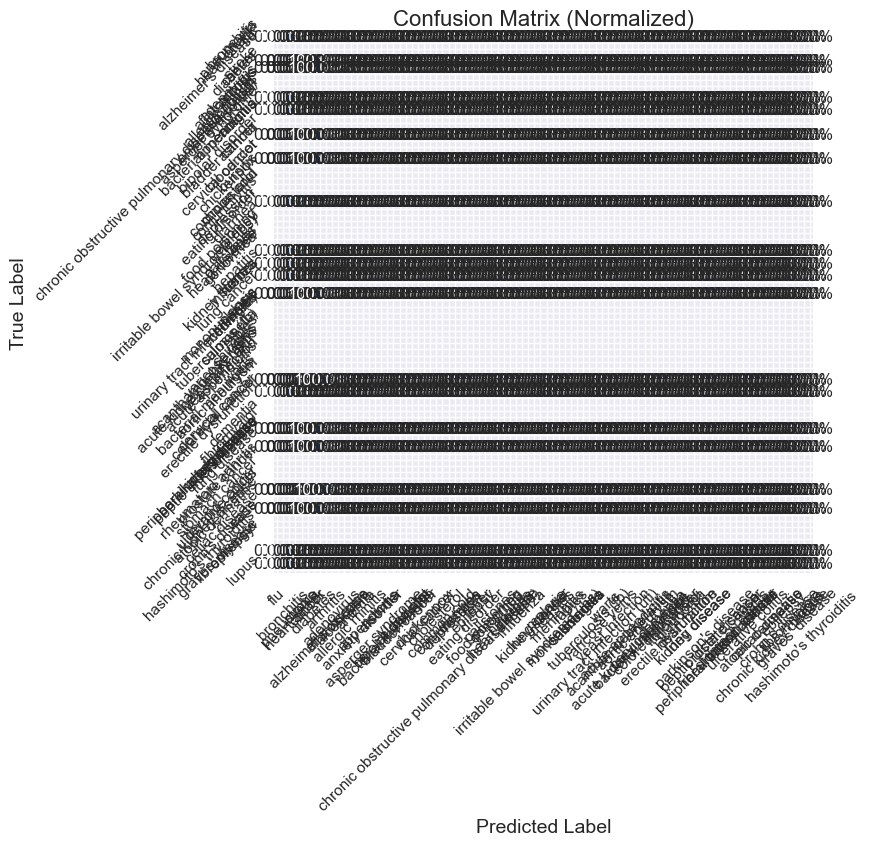

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv("dataset.csv")  # Replace with your file path
data['symptoms_combined'] = data['symptoms'].apply(lambda x: ' '.join(x.split(',')))

# Split data
train_data, test_data, train_labels, test_labels = train_test_split(
    data['symptoms_combined'], data['disease'], test_size=0.2, random_state=42
)

# Create and train model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train_data, train_labels)

# Predict on test set
predicted_labels = model.predict(test_data)

# Display classification report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

# Generate and plot the confusion matrix
mat = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=data['disease'].unique(),
            yticklabels=data['disease'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Classification Report:
                            precision    recall  f1-score   support

      acanthamoebkeratitis       0.00      0.00      0.00       1.0
acute kidney injury (aki)        0.00      0.00      0.00       1.0
             aflatoxicosis       0.00      0.00      0.00       1.0
         allergic rhinitis       0.00      0.00      0.00       1.0
       alzheimer's disease       0.00      0.00      0.00       0.0
                 arthritis       0.00      0.00      0.00       0.0
         asperger syndrome       0.00      0.00      0.00       1.0
            bladder cancer       0.00      0.00      0.00       1.0
                    cancer       0.00      0.00      0.00       1.0
               common cold       0.00      0.00      0.00       1.0
      erectile dysfunction       0.00      0.00      0.00       1.0
              fibromyalgia       0.00      0.00      0.00       1.0
                       flu       0.00      0.00      0.00       1.0
                gallston

C:\Users\Luka Brennan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Luka Brennan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Luka Brennan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\

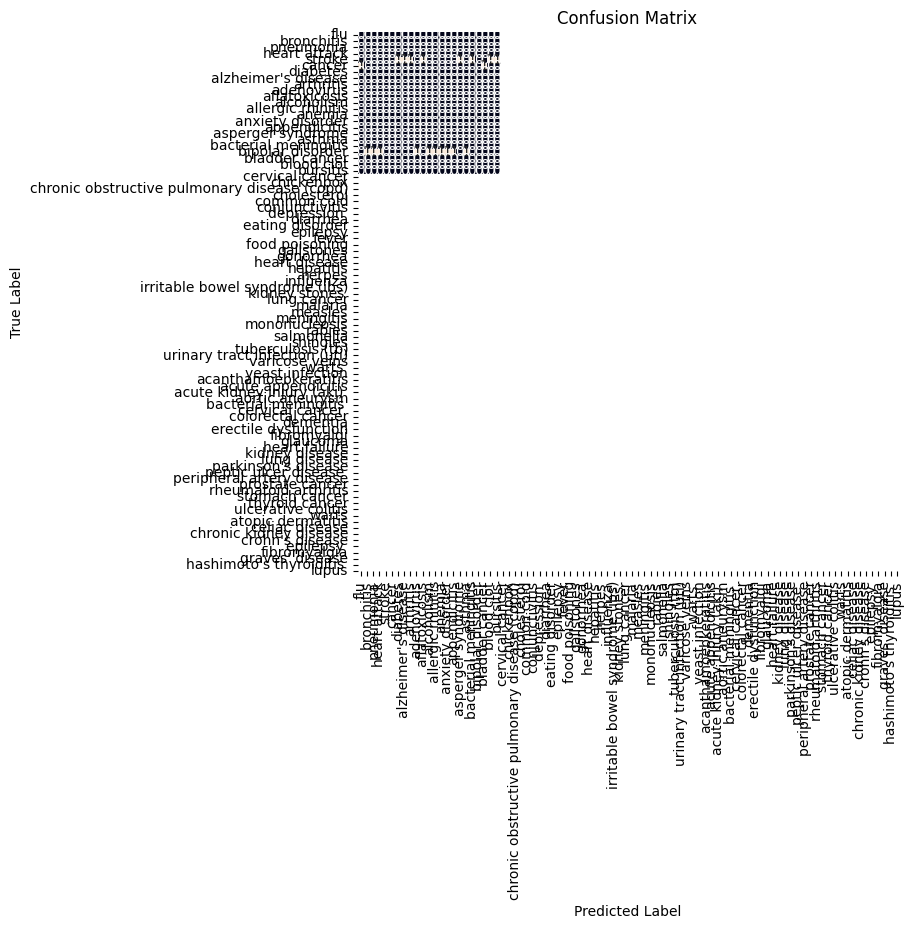

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv("dataset.csv")  # Replace with your file path
data['symptoms_combined'] = data['symptoms'].apply(lambda x: ' '.join(x.split(',')))

# Split data
train_data, test_data, train_labels, test_labels = train_test_split(
    data['symptoms_combined'], data['disease'], test_size=0.2, random_state=42
)

# Create and train model
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train_data, train_labels)

# Predict on test set
predicted_labels = model.predict(test_data)

# Display classification report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

# Generate the confusion matrix
mat = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=data['disease'].unique(),
            yticklabels=data['disease'].unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()